# MLP for Regression

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

## Import Data

Using the energy efficiency dataset from UCI.

In [2]:
dataset_path = keras.utils.get_file("ENB2012_data.xlsx", "http://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")

In [3]:
import pandas as pd

column_names = ['Relative Compactness', 'Surface Area', 'Wall Area',
               'Roof Area', 'Overall Height', 'Orientation',
               'Glazing Area', 'Glazing Area Distribution',
               'Heating Load', 'Cooling Load']
raw_dataset = pd.read_excel(dataset_path, names = column_names,
                           na_values = '?', comment = '\t',
                           sep = ' ', skipinitialspace = True)
dataset = raw_dataset.copy()

In [4]:
dataset.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
dataset.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Preprocess data

In [7]:
# Check for NA's
dataset.isna().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [8]:
# Split train/test data
total_train = dataset.sample(frac = 0.8, random_state = 0)
total_valid = dataset.drop(total_train.index)

In [9]:
# Predict Heating Load
y_train = total_train.pop('Heating Load')
y_valid = total_valid.pop('Heating Load')
X_train = total_train
X_valid = total_valid

In [10]:
# Normalize
X_train = tf.keras.utils.normalize(X_train, axis = -1, order = 2)
X_valid = tf.keras.utils.normalize(X_valid, axis = -1, order = 2)

## Build model

In [24]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation = 'relu', input_shape = [9]),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae', 'mse'])
    
    return model

In [25]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [27]:
EPOCHS = 500

history = model.fit(
    X_train, y_train,
    epochs = EPOCHS,
    verbose = 1,
    validation_data = (X_valid, y_valid),
    callbacks = [early_stop, tfdocs.modeling.EpochDots()]
)

Epoch 1/1000
14/20 [====================>.........] - ETA: 0s - loss: 585.6219 - mae: 22.0146 - mse: 585.6219
Epoch: 0, loss:579.4992,  mae:21.8624,  mse:579.4992,  val_loss:476.2133,  val_mae:19.3553,  val_mse:476.2133,  
20/20 [==============================] - 0s 13ms/step - loss: 579.4992 - mae: 21.8624 - mse: 579.4992 - val_loss: 476.2133 - val_mae: 19.3553 - val_mse: 476.2133
Epoch 2/1000
20/20 [==============================] - 0s 9ms/step - loss: 517.0501 - mae: 20.3806 - mse: 517.0501 - val_loss: 412.9945 - val_mae: 17.6445 - val_mse: 412.9945
Epoch 3/1000
20/20 [==============================] - 0s 7ms/step - loss: 438.2290 - mae: 18.3482 - mse: 438.2290 - val_loss: 333.0169 - val_mae: 15.2118 - val_mse: 333.0169
Epoch 4/1000
20/20 [==============================] - 0s 8ms/step - loss: 343.9639 - mae: 15.5967 - mse: 343.9639 - val_loss: 245.8704 - val_mae: 12.1029 - val_mse: 245.8704
Epoch 5/1000
20/20 [==============================] - 0s 12ms/step - loss: 246.7598 - mae: 12

Epoch 48/1000
20/20 [==============================] - 0s 18ms/step - loss: 25.4829 - mae: 3.9790 - mse: 25.4829 - val_loss: 24.6657 - val_mae: 3.7391 - val_mse: 24.6657
Epoch 49/1000
20/20 [==============================] - 0s 18ms/step - loss: 23.4500 - mae: 3.7419 - mse: 23.4500 - val_loss: 22.1406 - val_mae: 3.5695 - val_mse: 22.1406
Epoch 50/1000
20/20 [==============================] - ETA: 0s - loss: 23.8202 - mae: 3.6900 - mse: 23.8202 - 0s 13ms/step - loss: 21.8179 - mae: 3.5526 - mse: 21.8179 - val_loss: 20.2664 - val_mae: 3.4106 - val_mse: 20.2664
Epoch 51/1000
20/20 [==============================] - 0s 17ms/step - loss: 20.2806 - mae: 3.3695 - mse: 20.2806 - val_loss: 20.7692 - val_mae: 3.6960 - val_mse: 20.7692
Epoch 52/1000
20/20 [==============================] - 0s 17ms/step - loss: 19.6275 - mae: 3.3103 - mse: 19.6275 - val_loss: 18.5193 - val_mae: 3.3562 - val_mse: 18.5193
Epoch 53/1000
20/20 [==============================] - 0s 13ms/step - loss: 18.5888 - mae: 3.15

Epoch 142/1000
20/20 [==============================] - 0s 9ms/step - loss: 13.0239 - mae: 2.5869 - mse: 13.0239 - val_loss: 12.4176 - val_mae: 2.5605 - val_mse: 12.4176
Epoch 143/1000
20/20 [==============================] - 0s 9ms/step - loss: 13.0286 - mae: 2.5801 - mse: 13.0286 - val_loss: 11.3285 - val_mae: 2.4507 - val_mse: 11.3285
Epoch 144/1000
20/20 [==============================] - 0s 15ms/step - loss: 13.1279 - mae: 2.5864 - mse: 13.1279 - val_loss: 11.3417 - val_mae: 2.4723 - val_mse: 11.3417
Epoch 145/1000
20/20 [==============================] - 0s 16ms/step - loss: 13.0123 - mae: 2.5764 - mse: 13.0123 - val_loss: 11.8337 - val_mae: 2.4946 - val_mse: 11.8337
Epoch 146/1000
20/20 [==============================] - 0s 17ms/step - loss: 12.9585 - mae: 2.5697 - mse: 12.9585 - val_loss: 11.3214 - val_mae: 2.4458 - val_mse: 11.3214
Epoch 147/1000
20/20 [==============================] - 0s 14ms/step - loss: 12.8745 - mae: 2.5644 - mse: 12.8745 - val_loss: 11.3645 - val_mae: 2.

Epoch 190/1000
20/20 [==============================] - 0s 19ms/step - loss: 11.5162 - mae: 2.4191 - mse: 11.5162 - val_loss: 9.9156 - val_mae: 2.2938 - val_mse: 9.9156
Epoch 191/1000
20/20 [==============================] - 0s 12ms/step - loss: 11.2674 - mae: 2.4155 - mse: 11.2674 - val_loss: 9.8385 - val_mae: 2.2657 - val_mse: 9.8385
Epoch 192/1000
20/20 [==============================] - 0s 9ms/step - loss: 11.4030 - mae: 2.4112 - mse: 11.4030 - val_loss: 9.7839 - val_mae: 2.2742 - val_mse: 9.7839
Epoch 193/1000
20/20 [==============================] - 0s 9ms/step - loss: 11.2962 - mae: 2.4033 - mse: 11.2962 - val_loss: 9.8299 - val_mae: 2.2605 - val_mse: 9.8299
Epoch 194/1000
20/20 [==============================] - 0s 8ms/step - loss: 11.4052 - mae: 2.4012 - mse: 11.4052 - val_loss: 10.6741 - val_mae: 2.3896 - val_mse: 10.6741
Epoch 195/1000
20/20 [==============================] - 0s 11ms/step - loss: 11.2861 - mae: 2.4094 - mse: 11.2861 - val_loss: 9.7741 - val_mae: 2.2724 - val

20/20 [==============================] - 0s 12ms/step - loss: 9.1114 - mae: 2.1645 - mse: 9.1114 - val_loss: 7.9076 - val_mae: 2.0170 - val_mse: 7.9076
Epoch 287/1000
20/20 [==============================] - 0s 11ms/step - loss: 8.9490 - mae: 2.1372 - mse: 8.9490 - val_loss: 8.5346 - val_mae: 2.1495 - val_mse: 8.5346
Epoch 288/1000
20/20 [==============================] - 0s 9ms/step - loss: 8.8530 - mae: 2.1286 - mse: 8.8530 - val_loss: 7.6686 - val_mae: 1.9361 - val_mse: 7.6686
Epoch 289/1000
20/20 [==============================] - 0s 9ms/step - loss: 8.8958 - mae: 2.1341 - mse: 8.8958 - val_loss: 7.6533 - val_mae: 1.9380 - val_mse: 7.6533
Epoch 290/1000
20/20 [==============================] - 0s 9ms/step - loss: 8.8851 - mae: 2.0987 - mse: 8.8851 - val_loss: 8.6527 - val_mae: 2.1089 - val_mse: 8.6527
Epoch 291/1000
20/20 [==============================] - 0s 12ms/step - loss: 8.8891 - mae: 2.1426 - mse: 8.8891 - val_loss: 7.7112 - val_mae: 1.9298 - val_mse: 7.7112
Epoch 292/1000
2

## Evaluate the model

5/5 - 0s - loss: 9.8835 - mae: 2.4448 - mse: 9.8835


[9.883513450622559, 2.444809913635254, 9.883513450622559]

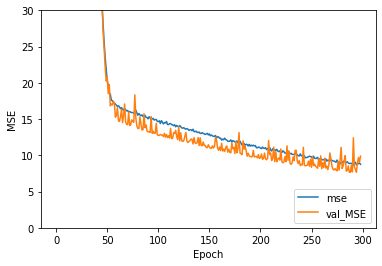

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['mse'], label = 'mse')
plt.plot(history.history['val_mse'], label = 'val_MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.ylim([0, 30])
plt.legend(loc = 'lower right')

model.evaluate(X_valid, y_valid, verbose = 2)

## Make predictions

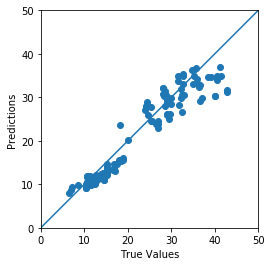

In [33]:
preds = model.predict(X_valid).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(y_valid, preds)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

View error distribution.

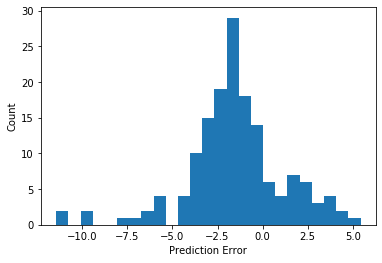

In [34]:
error = preds - y_valid
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")